In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from torch import nn
import torch.nn.functional as F

In [2]:
df = pd.read_csv("train.csv")
df.drop(['id'],axis = 1,inplace=True)
df_1 = df[df["Response"]==1]
df_0 = df[df["Response"]==0]
df_00 = df_0.sample(n=len(df_1))
#df = df_1.append(df_00)
#df = df.reset_index(drop=True)
len(df)

381109

In [3]:
def one(df):
    df2 = df.copy()
    for i in df2.columns:
        if df2[i].dtype == object:
            d = pd.get_dummies(df2[i],prefix = i)
            df2.drop(i,axis=1,inplace=True)
            df2 = df2.join(d)
    return(df2)

In [4]:
def label(df):
    df1 = df.copy()
    lab = LabelEncoder()
    for i in df1.columns:
        if df[i].dtype == object:
            df1[i] = lab.fit_transform(df[i]).astype('float64')
    return df1

In [5]:
df2 = one(df)
#df2 = label(df)
#df2 = df.copy()
x = df2.drop('Response',axis=1).values
y = df2['Response'].values 
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [6]:
X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)

In [7]:
class ANN_Model(nn.Module):
    def __init__(self,input_features=14,hidden1=20,hidden2=20,out_features=2):
        super().__init__()
        self.f_connected1=nn.Linear(input_features,hidden1)
        self.f_connected2=nn.Linear(hidden1,hidden2)
        self.out=nn.Linear(hidden2,out_features)
    def forward(self,x):
        x=F.relu(self.f_connected1(x))
        x=F.relu(self.f_connected2(x))
        x=self.out(x)
        return x

In [8]:
model=ANN_Model()

In [9]:
loss_function=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.005)

In [10]:
epochs=500
final_losses=[]
for i in range(epochs):
    i=i+1
    y_pred=model.forward(X_train)
    loss=loss_function(y_pred,y_train)
    final_losses.append(loss)
    if i%10==1:
        print("Epoch number: {} and the loss : {}".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch number: 1 and the loss : 477.34222412109375
Epoch number: 11 and the loss : 55.30725860595703
Epoch number: 21 and the loss : 22.401880264282227
Epoch number: 31 and the loss : 3.1234207153320312
Epoch number: 41 and the loss : 0.7032174468040466
Epoch number: 51 and the loss : 0.4827914237976074
Epoch number: 61 and the loss : 1.8180721998214722
Epoch number: 71 and the loss : 0.7271084189414978
Epoch number: 81 and the loss : 0.7171509265899658
Epoch number: 91 and the loss : 0.5423282980918884
Epoch number: 101 and the loss : 0.5875723361968994
Epoch number: 111 and the loss : 0.4909246563911438
Epoch number: 121 and the loss : 0.426553338766098
Epoch number: 131 and the loss : 0.4118593633174896
Epoch number: 141 and the loss : 0.40723374485969543
Epoch number: 151 and the loss : 0.4038308262825012
Epoch number: 161 and the loss : 0.3980865478515625
Epoch number: 171 and the loss : 0.39463886618614197
Epoch number: 181 and the loss : 0.3912251889705658
Epoch number: 191 and t

Text(0.5, 0, 'Epoch')

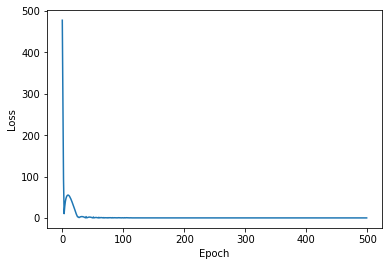

In [11]:
plt.plot(range(epochs),final_losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [12]:
predictions=[]
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_pred=model(data)
        predictions.append(y_pred.argmax().item())
        #print(y_pred.argmax().item())

In [13]:
from sklearn.metrics import confusion_matrix as cm
c = cm(y_test,predictions)
c

array([[66846,     0],
       [ 9376,     0]], dtype=int64)

In [14]:
from sklearn.metrics import accuracy_score as ac
score = ac(y_test,predictions)
score

0.8769908950171866

In [25]:
val = pd.read_csv("test.csv")
id = val["id"]
val = val.drop("id",axis=1)
x = one(val).values
x = torch.FloatTensor(x)
Y=[]
with torch.no_grad():
    for i,data in enumerate(x):
        y_pred=model(data)
        Y.append(y_pred.argmax().item())

In [29]:
f = {"id":id,"Response":Y}
f = pd.DataFrame(f)

In [32]:
f.to_csv("sub.csv",index=False)